In [3]:
# Import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy import interpolate

In [293]:
# Import data set
df_raw = pd.read_excel("Flux_resultats_python.xlsx")
print(df_raw.head(3))
print(df_raw.tail(3))

   1 isthme sur 2  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0             NaN        0.00        0.40        0.70        1.00        1.50   
1             0.5       41.21       40.28       39.67       39.29       39.31   
2             1.5       45.40       43.47       42.47       42.23       42.23   

   Unnamed: 6  Tous les isthmes  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0         NaN               NaN        0.00        0.20         0.35   
1         NaN               0.5       41.21       40.08        39.39   
2         NaN               1.5       45.40       43.31        41.88   

   Unnamed: 11  Unnamed: 12  
0         0.50         0.75  
1        38.78        37.92  
2        40.77        39.20  
   1 isthme sur 2  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
3             2.5       46.16       44.12       43.54       43.57       43.58   
4             3.5       46.30       44.37       44.28       44.19       44.15   
5             6.5      

In [308]:
print(df_raw.head())

d_bp = df_raw.iloc[1:,0]
d_bp.index = range(0,len(d_bp))

ei_1i2 = df_raw.iloc[0,1:6]
ei_ti= df_raw.iloc[0,8:]

df_1i2 = df_raw.iloc[1:,1:6]
df_ti = df_raw.iloc[1:,8:]

df_1i2.index = d_bp
df_1i2.columns = ei_1i2

df_ti.index = d_bp
df_ti.columns = ei_ti

print("\n1 isthme 2:\n",df_1i2)
print("\ntout isthme:\n",df_ti)

   1 isthme sur 2  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0             NaN        0.00        0.40        0.70        1.00        1.50   
1             0.5       41.21       40.28       39.67       39.29       39.31   
2             1.5       45.40       43.47       42.47       42.23       42.23   
3             2.5       46.16       44.12       43.54       43.57       43.58   
4             3.5       46.30       44.37       44.28       44.19       44.15   

   Unnamed: 6  Tous les isthmes  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0         NaN               NaN        0.00        0.20         0.35   
1         NaN               0.5       41.21       40.08        39.39   
2         NaN               1.5       45.40       43.31        41.88   
3         NaN               2.5       46.16       44.02        42.46   
4         NaN               3.5       46.30       44.17        42.58   

   Unnamed: 11  Unnamed: 12  
0         0.50         0.75  
1        38.78      

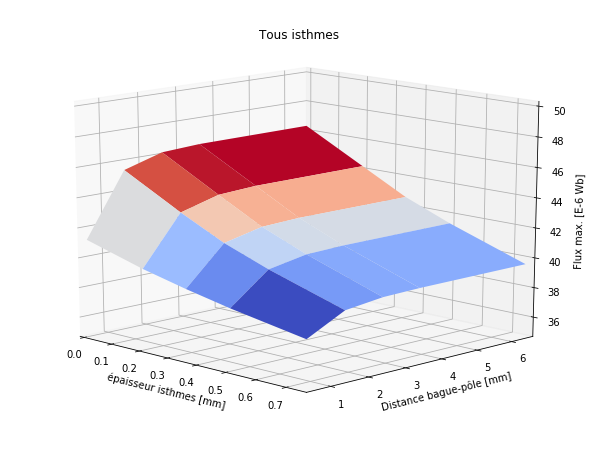

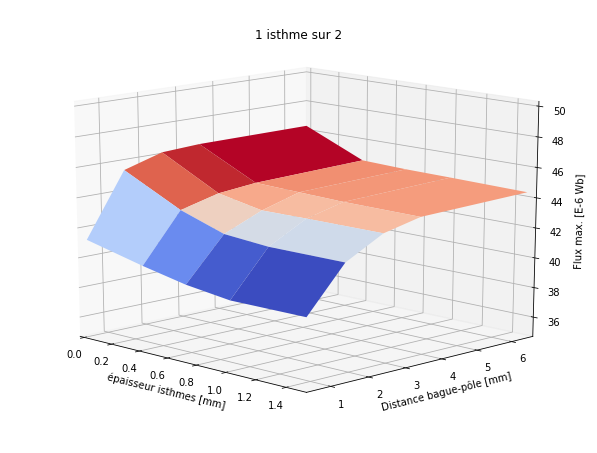

In [533]:
to_plot = ["Tous isthmes","1 isthme sur 2"]
ei = [ei_ti,ei_1i2]
df_i = [df_ti,df_1i2]

for i, elem_to_plot in enumerate(to_plot):

    rrange0, rrange1 = np.meshgrid(ei[i],d_bp) #Create a meshgrid to 3D plot
    cmap_list = [cm.PiYG, cm.coolwarm]
    ax = Axes3D(plt.figure(figsize=(8, 6)))
    ax.plot_surface(rrange0, rrange1, df_i[i], cmap=cm.coolwarm, label="1 isthme sur 2")
    ax.set_xlabel("épaisseur isthmes [mm]")
    ax.set_ylabel("Distance bague-pôle [mm]")
    ax.set_zlabel("Flux max. [E-6 Wb]")
    ax.set_zlim3d([35,50])
    ax.view_init(elev=15, azim=315)
    plt.title(elem_to_plot)
    plt.margins(0)
    plt.savefig("Flux_3dplot_"+str(elem_to_plot)+".pdf")
    plt.show()

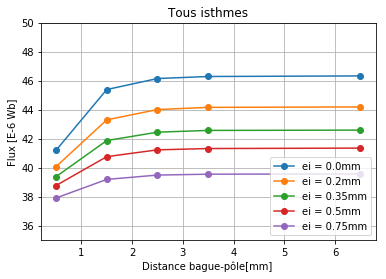

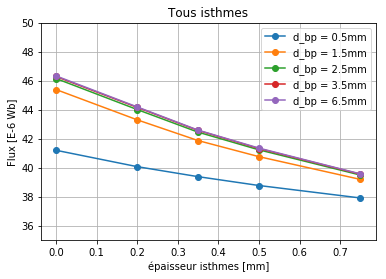

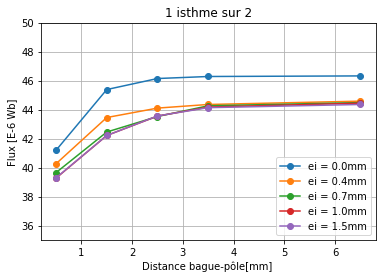

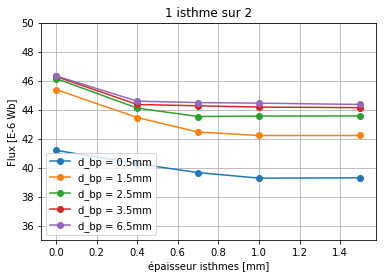

In [642]:
for i, elem_to_plot in enumerate(to_plot):
    for j in range(0,len(d_bp)):
        plt.plot(d_bp,df_i[i].iloc[:,j],'o-', label="ei = "+str(ei[i][j])+"mm")
        plt.legend(loc = "lower right")
        plt.xlabel("Distance bague-pôle[mm] ")
        plt.ylabel("Flux [E-6 Wb]")
        plt.title(elem_to_plot)
        plt.ylim([35,50])
    plt.grid()
    plt.savefig("Flux_dbp_"+str(elem_to_plot)+".pdf")
    plt.show()
    
    for j in range(0,len(ei[i])):
        plt.plot(ei[i],df_i[i].iloc[j,:],'o-', label="d_bp = "+str(d_bp[j])+"mm")
        plt.legend(loc = "best")
        plt.xlabel("épaisseur isthmes [mm]")
        plt.ylabel("Flux [E-6 Wb]")
        plt.title(elem_to_plot)
        plt.ylim([35,50])
    plt.grid()
    plt.savefig("Flux_ei_"+str(elem_to_plot)+".pdf")
    plt.show()    

In [663]:
# Extrapolate values for all isthmes,
#h_new = (h/2^(1/2)) flexion pouttre I = bh^3/12 sigma = my/I => dépend carré et pas cube
print(ei_1i2/(2**(1/2)))
ei_intp = [0, 0.28, 0.49, 0.71, 1.06]
df_ti_ip = pd.DataFrame(np.empty([len(d_bp),len(ei_ti)]))

for dist in range(0,len(d_bp)):
    f = interpolate.interp1d(ei_ti, df_ti.iloc[dist,:], fill_value = "extrapolate")
    df_ti_ip.iloc[dist,:] = np.round(f(ei_intp),2)
    
print(df_ti_ip.values)
print(df_ti.values)

Unnamed: 1    0.000000
Unnamed: 2    0.282843
Unnamed: 3    0.494975
Unnamed: 4    0.707107
Unnamed: 5    1.060660
Name: 0, dtype: float64
[[ 41.21  39.71  38.82  38.06  36.85]
 [ 45.4   42.55  40.84  39.45  37.25]
 [ 46.16  43.19  41.32  39.78  37.34]
 [ 46.3   43.32  41.41  39.84  37.37]
 [ 46.34  43.35  41.44  39.86  37.37]]
[[ 41.21  40.08  39.39  38.78  37.92]
 [ 45.4   43.31  41.88  40.77  39.2 ]
 [ 46.16  44.02  42.46  41.24  39.5 ]
 [ 46.3   44.17  42.58  41.33  39.56]
 [ 46.34  44.2   42.6   41.36  39.58]]


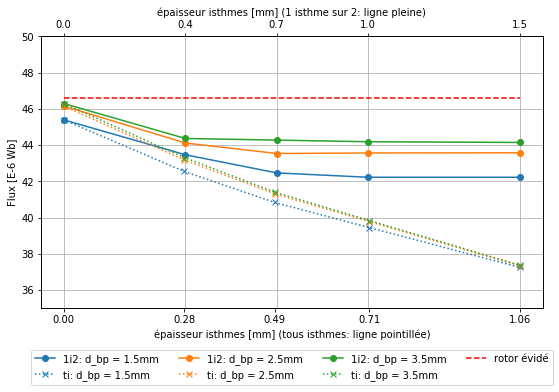

In [744]:
#plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(9,5))

box = ax.get_position()
ax.set_position([box.x0, box.y0+0.05, box.width, box.height])

newax = ax.twiny()
newax.set_position([box.x0, box.y0+0.05, box.width, box.height])

# Make some room at the bottom
#fig.subplots_adjust(bottom=0.20)

# I'm guessing you want them both on the bottom...
ax.set_frame_on(True)
ax.patch.set_visible(False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

newax.set_frame_on(True)
newax.patch.set_visible(False)
newax.xaxis.set_ticks_position('bottom')
newax.xaxis.set_label_position('bottom')
#newax.spines['top'].set_position(('outward', 40))

lines = []
legends = []
for j in range(1,len(d_bp)-1):
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    
    ax.plot(ei_1i2,df_1i2.iloc[j,:],"o-",color=color, label = "1i2: d_bp = "+str(d_bp[j])+"mm")
    ax.plot([],[],"x:",color=color, label = "ti: d_bp = "+str(d_bp[j])+"mm") # bricolé pour legend
    newax.plot(ei_intp,df_ti_ip.iloc[j,:],"x:",color=color, label = "ti: d_bp = "+str(d_bp[j])+"mm")

ax.plot(ei_1i2,np.ones([len(ei_1i2)])*46.58,"--", color ="red", label= "rotor évidé")   
    
ax.xaxis.set_ticks(ei_1i2)
newax.xaxis.set_ticks(ei_intp)

ax.set_xlabel("épaisseur isthmes [mm] (1 isthme sur 2: ligne pleine)")
newax.set_xlabel("épaisseur isthmes [mm] (tous isthmes: ligne pointillée)") 
ax.set_ylabel("Flux [E-6 Wb]")


ax.legend(loc = "lower center",bbox_to_anchor=(0.5, -.3), ncol=4)
#ax.legend(loc = "best", ncol=4)

#plt.title("Comparaison 1 isthme sur 2 avec tous isthmes")
plt.ylim([35,50])
ax.grid()
plt.savefig("Flux_comparaison_ti_1i2.pdf", bbox_inches = "tight", pad_inches = 0.1)
plt.show()

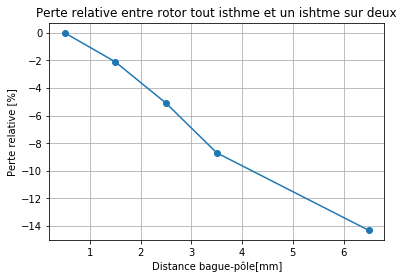

0     0.000000
1    -2.107888
2    -5.098760
3    -8.698646
4   -14.318495
Name: 2, dtype: float64


-1.8025898433667955

In [756]:
# perte rel entre 1i2 et ti pour resistance méc torsion égale
perte_rel = (df_ti_ip.iloc[2,:]-np.array(df_1i2.iloc[2,:]))/np.array(df_1i2.iloc[2,:])*100 

plt.plot(d_bp,perte_rel,'o-')
plt.xlabel("Distance bague-pôle[mm]")
plt.ylabel("Perte relative [%]")
plt.title("Perte relative entre rotor tout isthme et un ishtme sur deux")
plt.grid()
plt.show()

print(perte_rel)

((df_ti_ip.iloc[2,-1]-df_ti_ip.iloc[2,0])/(ei_intp[-1]-ei_intp[0]))/df_ti_ip.iloc[2,0]*100/10 # perte perf par 0.1mm de diff

In [655]:
# perte rel entre rotor évidée et rotor 1i2/ rotor ti ip
perte_rel_1i2 = (np.array(df_1i2.iloc[2,:])-46.58)/46.58*100 
perte_rel_ti_ip = (df_ti_ip.iloc[2,:]-46.58)/46.58*100 

print(perte_rel_1i2)
print(perte_rel_ti_ip)

delta = perte_rel_ti_ip - perte_rel_1i2
print(delta)

[-0.90167454 -5.28123658 -6.52640618 -6.46200086 -6.44053242]
0    -0.901675
1    -7.277802
2   -11.292400
3   -14.598540
4   -19.836840
Name: 2, dtype: float64
0     0.000000
1    -1.996565
2    -4.765994
3    -8.136539
4   -13.396307
Name: 2, dtype: float64


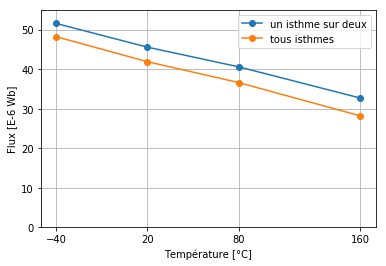

Ti [48.219999999999999, 41.890000000000001, 36.609999999999999, 28.18]

1i2 [51.57, 45.57, 40.59, 32.69]
[ -6.49602482  -8.07548826  -9.80537078 -13.79626797]


In [769]:
Temp = [-40, 20, 80, 160]
flux_w10 = [51.57, 45.57, 40.59, 32.69]


flux_w05_i = np.array([49.65, 43.34, 38.09, 29.71])
flux_w075_i = np.array([47.95, 41.61, 36.33, 27.89])

flux_ti_temp = []
for i in  range(0,len(flux_w05_i)):
    g = interpolate.interp1d([0.5, 0.75], [flux_w05_i[i],flux_w075_i[i]], fill_value = "extrapolate")
    flux_ti_temp.append(np.round(g(0.71),2))
    
plt.plot(Temp,flux_w10,'o-', label= "un isthme sur deux")
plt.plot(Temp,flux_ti_temp,'o-', label= "tous isthmes")
plt.xlabel("Température [°C]")
plt.ylabel("Flux [E-6 Wb]")
plt.ylim([0,55])
plt.xticks(Temp)

plt.legend(loc="best")
plt.grid()
plt.savefig("Flux_Temp_variation.pdf")
plt.show()

print("Ti",flux_ti_temp)
print("\n1i2",flux_w10)
print((np.array(flux_ti_temp)-np.array(flux_w10))/np.array(flux_w10)*100)

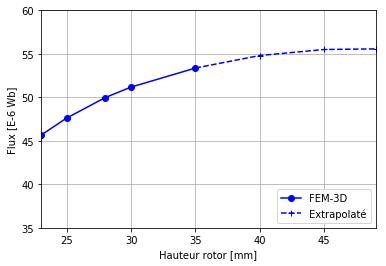

[  0.           4.31544359   9.48521358  12.11391019  16.91128149
  20.06571742  21.57721796  21.7305586 ]


In [808]:
# FEM-3D
Lrotor = [23, 25, 28, 30, 35, 40, 45, 49]
Flux3D = np.array([45.65, 47.62, 49.98, 51.18, 53.37, 54.81, 55.5, 55.57])

plt.plot(Lrotor[:-3],Flux3D[:-3],'bo-', label="FEM-3D")
plt.plot(Lrotor[-4:],Flux3D[-4:],'b+--',label="Extrapolaté")
#plt.plot(Lrotor,Flux3D,'o-')
plt.xlabel("Hauteur rotor [mm]")
plt.ylabel("Flux [E-6 Wb]")
plt.xlim([23,49])
plt.ylim([35,60])
#plt.xticks(Temp)

plt.legend(loc="lower right")
plt.grid()
plt.savefig("Flux_3D.pdf")
plt.show()

gain_rel = (Flux3D-Flux3D[0])/Flux3D[0]*100
print(gain_rel)

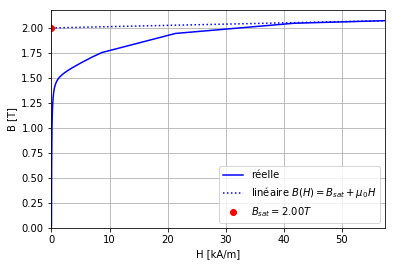

In [167]:
# Cogent M270-50A
# Import data set
BH_raw = pd.read_excel("Cogent_M270_50A.xls", skiprows=2, index_col=0).iloc[:2,:].dropna(axis=1)
H = BH_raw.loc["H"]
B = BH_raw.loc["B"]
mu0 = H.index[0]
B_lin = B.max() - (H.max()-H)*mu0
H.set_value(H.index[0],0.01) # si plot log pour pas avoir 0
B.set_value(B.index[0],0.01) 

plt.plot(H/1000, B,"b-", label = "réelle")
plt.plot(H/1000, B_lin, "b:", label = "linéaire $B(H) = B_{sat} + \mu_0H$")
plt.plot(H[0]/1000, B_lin[0], "ro", label="$B_{sat} = %.2fT$"%(B_lin[0]))

plt.xlim([-.15, H.max()/1000])
plt.ylim(bottom=0)
plt.legend(loc = "lower right")
plt.xlabel("H [kA/m]")
plt.ylabel("B [T]")
plt.grid()
plt.savefig("BH_M270.pdf")
plt.show()